# TheKeys
**EDA for the King County Housing Dataset**

# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import os
import gmaps 
import gmaps.datasets 
import gmaps.geojson_geometries

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math

# Read in Data

In [2]:
df = pd.read_csv('datasets/kc_house_data.csv')

# EDA

## Initial Review

**Data Summary**
* 21 columns
* 21597 rows
* columns that contain NaN
    * waterfront
    * view
    * yr_renovated
* columns with object data that should be another type
    * date - convert to datetime
    * sqft_basement - convert to numeric


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Convert Data Types

Columns identified as needing type conversion
* date - convert to datetime
* sqft_basement - convert to numeric

### Assign new dataframe variable for the cleaned data

In [6]:
df_clean = df

### sqft_basement
convert to float

In [7]:
df_clean.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3260.0        1
172.0         1
475.0         1
3480.0        1
704.0         1
Name: sqft_basement, Length: 304, dtype: int64

**sqft_basement** contains a ? for 454 rows.

Will convert that to 0 b/c unknown basement should be considered no basement because that is the default, unless new data is received later

In [8]:
df_clean.loc[df_clean.sqft_basement == '?', 'sqft_basement'] = '0'

In [9]:
df_clean.sqft_basement = df_clean.sqft_basement.astype(float)

### date
convert to datetime

In [10]:
df_clean.date = pd.to_datetime(df.date)

## Review and deal with NaN type values

columns that contain NaN
* waterfront
* view
* yr_renovated

### waterfront

In [11]:
df_clean.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

**waterfront is a binary category, will treat rows with NaN as 0, no view to a waterfront b/c
it is the more conservative choice**

In [12]:
df_clean.waterfront.fillna(0.0, inplace=True)

### view

In [13]:
df_clean.view.value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

The category has valid values of 0,1,2,3,4. presumably the number of times the property has been viewed,
although it seems strange that the max is 4, so the data likely was transformed into 4 bins
potentially quartiles.

Since most of the houses have a value of 0.0, I will replace the NaN's with 0.0

In [14]:
df_clean.view.fillna(0.0, inplace=True)

### yr_renovated

In [15]:
df_clean.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [16]:
df_clean.yr_renovated.value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

Besides NaN, most of the data is set to 0.0, which can be taken to mean there is no data on a renovation or 
that the house was never renovated.

The Nan's will be set to 0.0, since that seems to be the default value, and no renovation is 
equivalent to no known renovation.

In [17]:
df_clean.yr_renovated.fillna(0.0, inplace=True)

### Look for strange values

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Look at the max values of the data columns

In [19]:
for col in df_clean.columns:
    print(f'Max for {col}')
    display(df_clean[df_clean[col] == df_clean[col].max()])

Max for id


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15937,9900000190,2014-10-30,268950.0,3,1.0,1320,8100,1.0,0.0,0.0,3,6,880,440.0,1943,0.0,98166,47.4697,-122.351,1000,8100


Max for date


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,5,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590


Max for price


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


Max for bedrooms


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Max for bathrooms


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Max for sqft_living


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Max for sqft_lot


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,2015-03-27,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581


Max for floors


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,1972202010,2014-08-01,435000.0,3,3.00,1440,1350,3.5,0.0,2.0,3,8,1440,0.0,2005,0.0,98103,47.6525,-122.345,1440,1350
11582,3180100023,2015-01-30,544000.0,3,2.50,1760,1755,3.5,0.0,0.0,3,8,1760,0.0,1998,0.0,98105,47.6688,-122.279,1700,1721
14871,8673400177,2015-04-02,525000.0,3,3.00,1730,1074,3.5,0.0,0.0,3,8,1730,0.0,2006,0.0,98107,47.6692,-122.392,1370,1185
15410,1702900664,2015-04-16,479000.0,2,2.50,1730,1037,3.5,0.0,0.0,3,8,1730,0.0,2008,0.0,98118,47.5594,-122.285,1280,1026
18462,1346300150,2014-10-20,3300000.0,8,4.00,7710,11750,3.5,0.0,0.0,5,12,6090,1620.0,1904,0.0,98112,47.6263,-122.314,4210,8325
20292,1972200426,2014-09-18,525000.0,2,2.75,1310,1268,3.5,0.0,0.0,3,8,1310,0.0,2007,0.0,98103,47.6534,-122.355,1350,1288
20756,1972200428,2014-06-25,563500.0,3,2.50,1400,1312,3.5,0.0,0.0,3,8,1400,0.0,2007,0.0,98103,47.6534,-122.355,1350,1312


Max for waterfront


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,2015-03-17,1900000.0,3,2.50,2830,4334,3.0,1.0,4.0,3,10,2830,0.0,2006,0.0,98074,47.6318,-122.071,2830,38211
20309,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,3,11,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634
20751,8043700105,2015-04-17,2300000.0,4,4.00,4360,8175,2.5,1.0,4.0,3,10,3940,420.0,2007,0.0,98008,47.5724,-122.104,2670,8525
21185,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,3,11,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762


Max for view


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,3,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
58,7922800400,2014-08-27,951000.0,5,3.25,3250,14342,2.0,0.0,4.0,4,8,3250,0.0,1968,0.0,98008,47.5880,-122.116,2960,11044
230,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20751,8043700105,2015-04-17,2300000.0,4,4.00,4360,8175,2.5,1.0,4.0,3,10,3940,420.0,2007,0.0,98008,47.5724,-122.104,2670,8525
20907,7852070210,2014-05-27,1150000.0,4,3.00,5940,11533,2.0,0.0,4.0,3,11,4950,990.0,2004,0.0,98065,47.5443,-121.870,4240,12813
21034,2424059170,2015-02-19,900000.0,5,6.00,7120,40806,2.0,0.0,4.0,3,12,5480,1640.0,2007,0.0,98006,47.5451,-122.114,3440,36859
21185,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,3,11,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762


Max for condition


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
25,1202000200,2014-11-03,233000.0,3,2.00,1710,4697,1.5,0.0,0.0,5,6,1710,0.0,1941,0.0,98002,47.3048,-122.218,1030,4705
27,3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,5,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
62,5072410070,2014-10-21,505000.0,3,1.75,2519,8690,2.0,0.0,0.0,5,8,2519,0.0,1973,0.0,98166,47.4428,-122.344,2500,9500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19588,7518504130,2014-06-26,663000.0,3,2.00,1480,3876,1.0,0.0,0.0,5,7,860,620.0,1928,0.0,98117,47.6808,-122.382,1660,3774
19604,3902100175,2014-07-28,850000.0,5,3.00,3900,5250,1.5,0.0,1.0,5,8,2620,1280.0,1931,0.0,98116,47.5577,-122.389,1950,5700
19857,3449000060,2014-10-01,320000.0,3,1.00,1400,9000,1.0,0.0,0.0,5,7,1400,0.0,1959,0.0,98059,47.5022,-122.145,1440,8400
19889,2888000030,2014-09-26,500000.0,4,2.25,2270,8196,1.0,0.0,0.0,5,7,1150,1120.0,1963,0.0,98034,47.7214,-122.227,1920,10122


Max for grade


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
4807,9831200500,2015-03-04,2480000.0,5,3.75,6810,7500,2.5,0.0,0.0,3,13,6110,700.0,1922,0.0,98102,47.6285,-122.322,2660,7500
5446,7237501190,2014-10-10,1780000.0,4,3.25,4890,13402,2.0,0.0,0.0,3,13,4890,0.0,2004,0.0,98059,47.5303,-122.131,5790,13539
6035,1725059316,2014-11-20,2390000.0,4,4.00,6330,13296,2.0,0.0,2.0,3,13,4900,1430.0,2000,0.0,98033,47.6488,-122.201,2200,9196
7028,853200010,2014-07-01,3800000.0,5,5.50,7050,42840,1.0,0.0,2.0,4,13,4320,2730.0,1978,0.0,98004,47.6229,-122.220,5070,20570
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
7900,1068000375,2014-09-23,3200000.0,6,5.00,7100,18200,2.5,0.0,0.0,3,13,5240,1860.0,1933,2002.0,98199,47.6427,-122.408,3130,6477
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
10362,3303850390,2014-12-12,2980000.0,5,5.50,7400,18898,2.0,0.0,3.0,3,13,6290,1110.0,2001,0.0,98006,47.5431,-122.112,6110,26442
13398,2426039123,2015-01-30,2420000.0,5,4.75,7880,24250,2.0,0.0,2.0,3,13,7880,0.0,1996,0.0,98177,47.7334,-122.362,2740,10761


Max for sqft_above


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Max for sqft_basement


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.557,-122.21,3270,10454


Max for yr_built


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
643,9385200045,2015-05-12,729500.0,3,2.50,1660,1091,3.0,0.0,1.0,3,9,1530,130.0,2015,0.0,98116,47.5818,-122.402,1510,1352
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0.0,0.0,3,10,2860,710.0,2015,0.0,98040,47.5784,-122.226,2230,10000
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0.0,0.0,3,6,710,0.0,2015,0.0,98144,47.5756,-122.316,1440,4800
4150,8077100031,2015-04-22,631000.0,3,2.25,1670,1396,2.0,0.0,0.0,3,9,1250,420.0,2015,0.0,98115,47.6814,-122.288,1610,5191
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,3,8,1000,200.0,2015,0.0,98144,47.6001,-122.298,1320,1852
8418,558100090,2015-03-12,628000.0,5,2.75,2600,8160,2.0,0.0,0.0,3,8,2600,0.0,2015,0.0,98133,47.7348,-122.340,1600,8160
14202,8156600210,2015-03-26,1290000.0,5,3.50,2980,5100,2.0,0.0,0.0,3,10,2370,610.0,2015,0.0,98115,47.6782,-122.299,1780,5100
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0.0,0.0,3,9,1280,290.0,2015,0.0,98199,47.6514,-122.385,1570,6000
14911,2770602360,2015-04-21,671000.0,4,2.75,1890,1475,2.0,0.0,0.0,3,9,1200,690.0,2015,0.0,98199,47.6472,-122.383,1650,1682


Max for yr_renovated


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2293,8712100320,2014-07-28,585000.0,5,2.75,2350,4178,1.5,0.0,0.0,3,8,1520,830.0,1922,2015.0,98112,47.6388,-122.300,1920,4178
3153,6821100195,2015-03-31,830000.0,4,3.00,2020,6000,1.0,0.0,0.0,3,8,1220,800.0,1968,2015.0,98199,47.6563,-122.401,1400,6000
4236,6071800100,2015-03-27,815000.0,6,3.00,2860,17853,1.0,0.0,0.0,3,8,1430,1430.0,1962,2015.0,98006,47.5460,-122.175,1920,13452
5678,2202500255,2015-03-05,335000.0,3,2.00,1210,9926,1.0,0.0,0.0,4,7,1210,0.0,1954,2015.0,98006,47.5731,-122.135,1690,9737
7090,9141100005,2014-10-28,285000.0,4,3.50,2770,10505,2.0,0.0,0.0,3,8,2770,0.0,1940,2015.0,98133,47.7412,-122.355,1760,10505
7410,8665900328,2015-01-23,459000.0,4,3.00,1900,9077,2.0,0.0,0.0,3,7,1900,0.0,1954,2015.0,98155,47.7684,-122.304,1900,12868
8683,8835401250,2015-05-06,1490000.0,6,2.75,4430,6440,2.0,0.0,3.0,3,10,2680,1750.0,1964,2015.0,98118,47.5462,-122.265,3530,7314
11587,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0.0,4.0,3,9,3090,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656
11621,461004730,2015-04-06,717000.0,3,1.00,1150,5000,1.0,0.0,0.0,3,8,1150,0.0,1959,2015.0,98117,47.6805,-122.369,1160,5000
14845,3585900665,2014-06-06,805000.0,5,2.50,4600,19831,1.0,0.0,3.0,3,9,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831


Max for zipcode


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
91,5036300431,2015-03-11,1100000.0,5,2.75,3520,6353,2.0,0.0,0.0,4,10,3520,0.0,2001,0.0,98199,47.6506,-122.391,2520,6250
274,4235400186,2014-11-24,331000.0,3,1.75,1080,1306,1.0,0.0,0.0,3,7,580,500.0,1954,2003.0,98199,47.6601,-122.400,1440,2225
551,1373800295,2014-10-13,1450000.0,3,3.00,4380,6320,2.0,0.0,3.0,5,10,3580,800.0,1952,0.0,98199,47.6452,-122.411,3080,7680
611,2321300390,2014-11-05,650000.0,3,2.00,1870,3388,1.0,0.0,0.0,4,8,1230,640.0,1925,0.0,98199,47.6372,-122.395,1780,4050
628,7010700292,2014-10-09,543500.0,3,2.25,1270,2790,1.0,0.0,0.0,3,7,990,280.0,1970,0.0,98199,47.6581,-122.396,1920,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21177,2770601912,2015-04-02,570000.0,3,3.25,1550,1280,2.0,0.0,0.0,3,9,1220,330.0,2013,0.0,98199,47.6493,-122.384,1550,1579
21410,1070000180,2014-10-15,1110000.0,4,3.50,3660,4760,2.0,0.0,0.0,3,9,2840,820.0,2014,0.0,98199,47.6482,-122.409,3210,4640
21461,7010700308,2014-11-12,1010000.0,4,3.25,3610,4000,2.0,0.0,0.0,3,9,2640,970.0,2007,0.0,98199,47.6580,-122.396,1980,4000
21486,2770601782,2014-08-01,453000.0,3,2.50,1510,1618,2.5,0.0,0.0,3,8,1330,180.0,2011,0.0,98199,47.6515,-122.384,1350,1397


Max for lat


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
306,7280300196,2015-04-03,550000.0,4,2.75,1800,7750,1.0,0.0,0.0,4,8,1400,400.0,1965,0.0,98177,47.7776,-122.384,1800,8275
15752,2644300005,2015-04-12,407500.0,4,2.50,1900,9075,2.0,0.0,0.0,3,7,1900,0.0,1988,0.0,98133,47.7776,-122.352,1800,8460
17450,5500200010,2014-10-14,389950.0,3,1.75,1580,9049,1.0,0.0,0.0,3,8,1580,0.0,1966,0.0,98177,47.7776,-122.375,2100,8446


Max for long


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2925,8649401270,2015-04-30,167000.0,1,1.00,780,10235,1.5,0.0,0.0,3,6,780,0.0,1989,0.0,98014,47.7130,-121.315,930,10165
4199,1437500015,2014-07-09,150000.0,3,0.75,490,38500,1.5,0.0,0.0,4,5,490,0.0,1959,0.0,98014,47.7112,-121.315,800,18297


Max for sqft_living15


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19842,2524069078,2015-01-22,2700000.0,4,4.0,7850,89651,2.0,0.0,0.0,3,12,7850,0.0,2006,0.0,98027,47.5406,-121.982,6210,95832


Max for sqft_lot15


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,2015-01-07,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200


Potential bad data
* bedrooms 33, the house is too small for that many bedrooms and only has 1.75 bathrooms
* sqft_lot 1,651,359, 4x bigger than the 15 surrounding lots.  Requires more investigation

#### Look at the min values of each column

In [20]:
for col in df_clean.columns:
    print(f'Min for {col}')
    display(df_clean[df_clean[col] == df_clean[col].min()])

Min for id


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,2014-09-16,280000.0,6,3.0,2400,9373,2.0,0.0,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,2015-04-22,300000.0,6,3.0,2400,9373,2.0,0.0,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316


Min for date


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
172,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0.0,0.0,3,7,1340,0.0,1955,0.0,98133,47.7658,-122.339,1480,7940
312,1860600135,2014-05-02,2380000.0,5,2.50,3650,9050,2.0,0.0,4.0,5,10,3370,280.0,1921,0.0,98119,47.6345,-122.367,2880,5400
502,5467900070,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0.0,0.0,4,8,1930,0.0,1966,0.0,98042,47.3672,-122.151,2200,12825
775,4040800810,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0.0,0.0,4,8,1000,1000.0,1963,0.0,98008,47.6188,-122.114,2070,8250
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0.0,0.0,4,7,1140,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000
21145,8564860280,2014-05-02,459990.0,3,2.50,2680,5539,2.0,0.0,0.0,3,8,2680,0.0,2013,0.0,98045,47.4761,-121.734,2990,6037
21271,123059127,2014-05-02,625000.0,4,3.25,2730,54014,1.0,0.0,0.0,3,9,1560,1170.0,2007,0.0,98059,47.5133,-122.110,2730,111274


Min for price


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,2014-05-06,78000.0,2,1.0,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,0.0,98168,47.4739,-122.28,1700,10387


Min for bedrooms


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
154,7920100045,2014-05-16,350000.0,1,1.00,700,5100,1.0,0.0,0.0,3,7,700,0.0,1942,0.0,98115,47.6790,-122.300,1010,5100
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
350,7325600160,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,0.0,3,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
648,922049078,2014-11-18,157000.0,1,1.00,870,26326,1.0,0.0,0.0,3,6,870,0.0,1939,0.0,98198,47.4152,-122.300,1250,10608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310,6003000851,2014-05-22,353000.0,1,1.00,550,1279,2.0,0.0,0.0,3,7,550,0.0,2008,0.0,98122,47.6160,-122.314,1460,1385
21316,9266700190,2015-05-11,245000.0,1,1.00,390,2000,1.0,0.0,0.0,4,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
21427,3278600750,2015-04-07,250000.0,1,1.50,1180,1688,2.0,0.0,0.0,3,8,1070,110.0,2007,0.0,98126,47.5490,-122.372,1380,2059
21503,1702901618,2015-04-07,420000.0,1,2.00,1070,675,2.0,0.0,0.0,3,8,880,190.0,2007,0.0,98118,47.5574,-122.284,1220,788


Min for bathrooms


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,3971701455,2014-10-03,273000.0,2,0.5,1180,7750,1.0,0.0,0.0,4,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
10413,7129800036,2015-01-14,109000.0,2,0.5,580,6900,1.0,0.0,0.0,3,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
11662,7987400316,2014-08-14,255000.0,1,0.5,880,1642,1.0,0.0,0.0,3,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992
12029,2991000160,2014-12-12,312500.0,4,0.5,2300,5570,2.0,0.0,0.0,3,8,2300,0.0,1996,0.0,98092,47.3285,-122.168,1820,6371


Min for sqft_living


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,2014-07-01,276000.0,1,0.75,370,1801,1.0,0.0,0.0,5,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000


Min for sqft_lot


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15729,9828702895,2014-10-22,700000.0,4,1.75,2420,520,1.5,0.0,0.0,3,7,2420,0.0,1900,0.0,98112,47.6209,-122.302,1200,1170


Min for floors


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21474,9512200090,2015-05-01,529000.0,3,1.75,2340,7724,1.0,0.0,0.0,3,10,2340,0.0,2010,0.0,98058,47.4593,-122.134,3040,5787
21488,8682291050,2014-07-08,810000.0,2,2.75,2700,8572,1.0,0.0,0.0,3,9,2700,0.0,2007,0.0,98053,47.7236,-122.033,2680,8569
21514,8964800330,2015-04-07,3000000.0,4,3.75,5090,14823,1.0,0.0,0.0,3,11,4180,910.0,2013,0.0,98004,47.6200,-122.207,3030,12752
21554,3438501862,2014-05-13,330000.0,3,2.50,1450,5008,1.0,0.0,0.0,3,7,840,610.0,2007,0.0,98106,47.5435,-122.357,2120,5019


Min for waterfront


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Min for view


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Min for condition


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,2014-05-28,550000.0,4,1.00,1660,34848,1.0,0.0,0.0,1,5,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467
380,1726059053,2014-09-16,270000.0,2,1.50,1380,209959,1.0,0.0,0.0,1,6,1380,0.0,1954,0.0,98011,47.7461,-122.195,3130,19868
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0.0,0.0,1,8,1940,0.0,1962,0.0,98006,47.5722,-122.129,2000,10071
1440,5694000710,2014-11-07,352950.0,3,1.00,1760,3000,1.5,0.0,0.0,1,6,1760,0.0,1900,0.0,98103,47.6598,-122.348,1320,1266
1732,913000340,2015-01-02,252000.0,1,1.00,680,1638,1.0,0.0,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
2221,3886902445,2015-03-16,535000.0,2,1.00,920,9000,1.0,0.0,0.0,1,6,920,0.0,1954,0.0,98033,47.6831,-122.189,1760,8400
3002,9187200245,2014-12-31,441000.0,4,1.50,1100,3300,1.0,0.0,0.0,1,7,1100,0.0,1919,0.0,98122,47.6033,-122.295,2020,4000
3199,723049596,2014-05-09,255000.0,2,1.00,810,7980,1.0,0.0,0.0,1,6,810,0.0,1928,0.0,98146,47.4890,-122.337,1440,7980
3971,6324000090,2015-05-11,210000.0,2,1.00,990,8140,1.0,0.0,0.0,1,6,990,0.0,1910,0.0,98116,47.5828,-122.382,2150,5000
4647,859000110,2014-10-02,125000.0,1,1.00,500,7440,1.0,0.0,0.0,1,5,500,0.0,1928,0.0,98106,47.5252,-122.362,1350,7440


Min for grade


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3220,2420069251,2015-02-25,262000.0,1,0.75,520,12981,1.0,0.0,0.0,5,3,520,0.0,1920,0.0,98022,47.2082,-121.995,1340,12233


Min for sqft_above


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,2014-07-01,276000.0,1,0.75,370,1801,1.0,0.0,0.0,5,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000


Min for sqft_basement


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Min for yr_built


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,8,2780,0.0,1900,0.0,98117,47.6981,-122.368,1830,6350
498,9274202270,2014-08-18,625000.0,2,1.50,1490,5750,1.5,0.0,0.0,4,7,1190,300.0,1900,0.0,98116,47.5872,-122.390,1590,4025
537,5694500105,2014-12-04,595000.0,2,2.00,1510,4000,1.0,0.0,0.0,4,7,1010,500.0,1900,0.0,98103,47.6582,-122.345,1920,4000
703,7011200260,2014-12-19,485000.0,4,2.00,1400,3600,1.0,0.0,0.0,3,7,1100,300.0,1900,0.0,98119,47.6385,-122.370,1630,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,1702901340,2014-06-13,718500.0,3,2.00,2910,6600,2.0,0.0,0.0,4,7,1920,990.0,1900,0.0,98118,47.5576,-122.281,1370,5500
19122,3388110230,2014-07-29,179000.0,4,1.75,1790,7175,1.5,0.0,0.0,3,6,1410,380.0,1900,0.0,98168,47.4963,-122.318,1790,8417
19304,4083302225,2014-10-14,850000.0,4,3.00,2550,3784,1.5,0.0,0.0,4,8,1750,800.0,1900,0.0,98103,47.6559,-122.338,2100,4560
19370,2420069042,2015-04-24,240000.0,3,2.00,1553,6550,1.0,0.0,0.0,3,7,1553,0.0,1900,0.0,98022,47.2056,-121.994,1010,10546


Min for yr_renovated


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Min for zipcode


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
38,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0.0,0.0,2,7,890,330.0,1969,0.0,98001,47.3341,-122.282,1290,7800
67,3717000160,2014-10-09,287000.0,4,2.50,2240,4648,2.0,0.0,0.0,3,7,2240,0.0,2005,0.0,98001,47.3378,-122.257,2221,4557
114,8961960160,2014-10-28,480000.0,4,2.50,3230,16171,2.0,0.0,0.0,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
213,4014400292,2015-01-14,465000.0,3,2.50,2714,17936,2.0,0.0,0.0,3,9,2714,0.0,2005,0.0,98001,47.3185,-122.275,2590,18386
292,1115450240,2014-10-22,360000.0,4,2.50,2160,9528,2.0,0.0,0.0,3,9,2160,0.0,1992,0.0,98001,47.3341,-122.255,2280,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,3094000210,2015-01-05,269950.0,3,2.50,2244,4079,2.0,0.0,0.0,3,7,2244,0.0,2012,0.0,98001,47.2606,-122.254,2077,4078
21463,6181500120,2014-06-23,312891.0,5,3.00,2300,8214,2.0,0.0,0.0,3,8,2300,0.0,2013,0.0,98001,47.3052,-122.276,2594,4950
21495,3304030220,2015-04-21,480000.0,4,2.50,2940,9172,2.0,0.0,0.0,3,9,2940,0.0,2006,0.0,98001,47.3444,-122.269,2660,7955
21549,5007500120,2015-02-26,341780.0,4,2.75,2260,4440,2.0,0.0,0.0,3,7,2260,0.0,2014,0.0,98001,47.3507,-122.291,2260,4563


Min for lat


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3292,9413400165,2014-06-24,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,4,7,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586


Min for long


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13873,3522029124,2014-12-03,575000.0,3,2.0,2690,435600,2.0,0.0,0.0,3,8,2690,0.0,1992,0.0,98070,47.3477,-122.519,1700,163350


Min for sqft_living15


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13428,2722059275,2015-05-12,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,4,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299


Min for sqft_lot15


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19653,7899800863,2014-10-01,299900.0,3,2.5,1210,2046,2.0,0.0,0.0,3,9,920,290.0,2008,0.0,98106,47.5212,-122.357,1070,651


Potential bad data
* price - 78,000 may be too odd.  Need to look at other low values.
* bathrooms - 0.5 with 4 bedrooms seems odd especially for a grade 8 house at 2300 sqft_living

#### Look for duplicate ids

In [21]:
duplicated_rows = df_clean.duplicated()

In [22]:
duplicated_rows.value_counts()

False    21597
dtype: int64

There are no duplicate rows.

In [23]:
duplicated_rows = df_clean.duplicated(subset='id', keep=False)

In [24]:
df_clean[duplicated_rows]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,3,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,3,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


There are 353 rows of properties with multiple sales.

In [25]:
df_clean[duplicated_rows][df_clean.yr_renovated != 0]

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,3,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,3,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
3946,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,4,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,4,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
8426,1721801010,2014-09-03,225000.0,3,1.00,1790,6120,1.0,0.0,0.0,3,6,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120
8427,1721801010,2015-04-24,302100.0,3,1.00,1790,6120,1.0,0.0,0.0,3,6,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120


None of the houses that are marked as renovated, were renovated in between sales, so for all the properties
with multiple sales, only the most recent sale should be included.

The dataframe is sorted by id and sale date, so the last occurrence can be kept.

#### Look at the houses with more bathrooms than bedrooms

In [26]:
df_clean[df_clean.bathrooms > df_clean.bedrooms].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,8.700000e+02,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,4.639373e+09,8.407679e+05,2.686207,3.168966,2575.634483,19750.889655,2.013218,0.032184,0.589655,3.197701,8.651724,2174.897701,388.322989,1992.758621,94.005747,98087.050575,47.602206,-122.238630,2142.316092,14752.810345
std,2.919721e+09,7.523344e+05,0.831856,0.899375,1548.456272,68122.210243,0.532703,0.176590,1.217681,0.493916,1.386053,1277.131055,549.681571,24.768184,422.959265,49.088209,0.098979,0.143627,900.206790,45282.114011
min,1.150131e+07,1.150000e+05,1.000000,1.250000,730.000000,609.000000,1.000000,0.000000,0.000000,3.000000,4.000000,550.000000,0.000000,1900.000000,0.000000,98001.000000,47.241600,-122.505000,850.000000,748.000000
25%,2.254752e+09,4.193925e+05,2.000000,2.500000,1460.000000,1449.750000,2.000000,0.000000,0.000000,3.000000,8.000000,1260.000000,0.000000,1988.000000,0.000000,98042.000000,47.548225,-122.356750,1450.000000,1766.500000
50%,3.771930e+09,6.000000e+05,3.000000,3.250000,2080.000000,4080.000000,2.000000,0.000000,0.000000,3.000000,8.000000,1720.000000,210.000000,2004.000000,0.000000,98103.000000,47.620600,-122.291000,1835.000000,4790.000000
75%,7.560000e+09,9.299875e+05,3.000000,3.500000,3317.500000,11017.250000,2.000000,0.000000,0.000000,3.000000,9.000000,2730.000000,600.000000,2007.000000,0.000000,98118.000000,47.672625,-122.128500,2660.000000,10254.250000
max,9.831200e+09,7.700000e+06,7.000000,8.000000,13540.000000,982278.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2014.000000,98199.000000,47.776000,-121.736000,6110.000000,858132.000000


With 863 properties, this doesn't seem to be a good consideration for bad data.

#### Clean "bad" data

**Duplicate properties**

In [27]:
df_clean = df_clean.drop_duplicates(subset='id', keep='last')

**33 bedrooms**

In [28]:
df_clean = df_clean.drop(df_clean[df_clean.bedrooms == 33].index)

look at the new max bedrooms

In [29]:
df_clean.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,3,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,3,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320
18428,8823901445,2015-03-13,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400


The other houses with 9+ bedrooms appear to just be large houses

**sqft_lot 1,651,359**

In [30]:
df_clean.nlargest(5, 'sqft_lot')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
17305,3326079016,2015-05-04,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730
7640,2623069031,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,2323089009,2015-01-19,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
3945,722069232,2014-09-05,998000.0,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0.0,1992,0.0,98058,47.4140,-122.087,2290,37141


The property with a sqft_lot of 1,651,359, is an outlier, but isn't necessarily bad data.

**price 78,000**

In [31]:
df_clean.nsmallest(10, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,0.0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
2139,1623049041,2014-05-08,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
18453,7999600180,2014-05-29,83000.0,2,1.00,900,8580,1.0,0.0,0.0,3,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
3763,1523049188,2015-04-30,84000.0,2,1.00,700,20130,1.0,0.0,0.0,3,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
16700,1322049150,2015-03-05,85000.0,2,1.00,910,9753,1.0,0.0,0.0,3,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
5860,9320900420,2014-10-14,89000.0,3,1.00,900,4750,1.0,0.0,0.0,4,6,900,0.0,1969,0.0,98023,47.3026,-122.363,900,3404
3106,1721801591,2015-02-19,89950.0,1,1.00,570,4080,1.0,0.0,0.0,3,5,570,0.0,1942,0.0,98146,47.5098,-122.334,890,5100
7985,2734100835,2015-03-03,90000.0,1,1.00,780,4000,1.0,0.0,0.0,3,5,780,0.0,1905,0.0,98108,47.5424,-122.321,1150,4000


not bad data, just the cheapest houses in the set

**bathrooms - 0.5**

In [32]:
df_clean[df_clean.bathrooms == 0.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,3971701455,2014-10-03,273000.0,2,0.5,1180,7750,1.0,0.0,0.0,4,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
10413,7129800036,2015-01-14,109000.0,2,0.5,580,6900,1.0,0.0,0.0,3,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
11662,7987400316,2014-08-14,255000.0,1,0.5,880,1642,1.0,0.0,0.0,3,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992
12029,2991000160,2014-12-12,312500.0,4,0.5,2300,5570,2.0,0.0,0.0,3,8,2300,0.0,1996,0.0,98092,47.3285,-122.168,1820,6371


seems too odd for a house of its size and built in 1996 to only have 0.5 baths. It should be assumed to be bad data and dropped.

In [33]:
df_clean = df_clean.drop(df_clean[df_clean.id == 2991000160].index)

## Review all the provided data columns

What features have the strongest influence on price?

### Sale Dates

In [34]:
df_clean.date.describe()

count                   21418
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

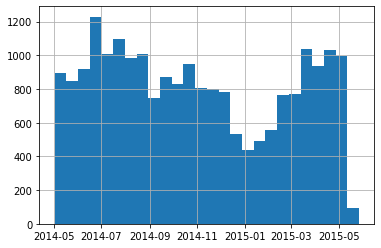

In [35]:
df_clean.date.hist(bins='auto')

In the time frame of the house sales in the dataset, there are 391 days and there were sales on 372 of those days.

Sales took a dip in early 2015.  The dataset is from King County in Washington state, so the cold weather probably depressed sales.

Sales in 2015 don't look to be on the same trend as in 2014, to find out why it would be good to look at other economic data.

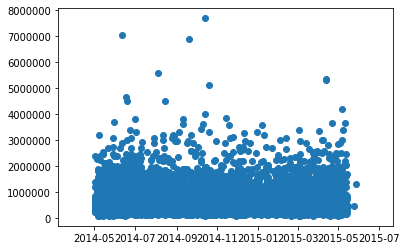

In [36]:
plt.scatter(df_clean.date, df_clean.price)

 date based upon day has no correlation to price

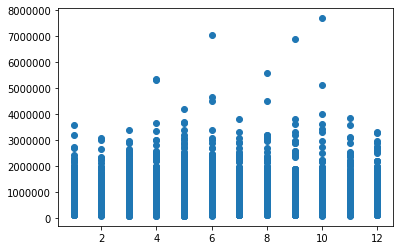

In [37]:
plt.scatter(df_clean.date.apply(lambda date: date.month), df_clean.price)

In [38]:
df_clean['sale_month'] = df_clean.date.apply(lambda date: date.month)

In [39]:
df_clean[['sale_month', 'price']].corr()

,sale_month,price
sale_month,1.000000,-0.007868
price,-0.007868,1.000000


date based upon month also has no correlation to price, but should be considered as a 
potential interaction with the waterfront properties.

### price - the target

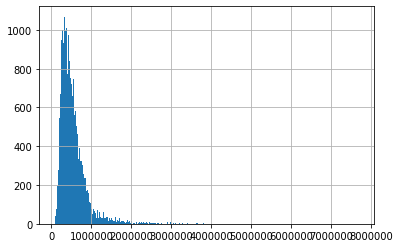

In [40]:
df_clean.price.hist(bins='auto')

It is very right skewed, the highest outliers may need to be dropped.

### bedrooms

In [41]:
df_clean.bedrooms.describe()

count    21418.000000
mean         3.372537
std          0.903024
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

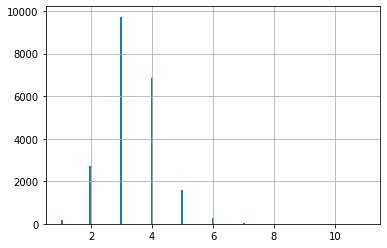

In [42]:
df_clean.bedrooms.hist(bins='auto')

In [43]:
df_clean.bedrooms.value_counts()

3     9731
4     6848
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [44]:
df_clean.bedrooms.value_counts(normalize=True)

3     0.454337
4     0.319731
2     0.127743
5     0.074050
6     0.012373
1     0.008918
7     0.001774
8     0.000607
9     0.000280
10    0.000140
11    0.000047
Name: bedrooms, dtype: float64

properties with less that one percent of the data may be candidates for dropping for being outliers, 
even though this column will be treated as continuous data.

In [45]:
df_clean[['bedrooms', 'price']].corr()

,bedrooms,price
bedrooms,1.000000,0.316944
price,0.316944,1.000000


The number of bedrooms has a low correlation to price.  That seems a little counter intuitive, because
people want enough bedrooms for their family and more bedrooms should demand a higher price, but potentially
number of bedrooms alone isn't strongly correlated.  Perhaps it's the size of the bedrooms too, and or their relation to other factors.  This should be investigated as a possible candidate for an interaction.

### bathrooms

### bathrooms

In [46]:
df_clean.bathrooms.describe()

count    21418.000000
mean         2.118522
std          0.768672
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

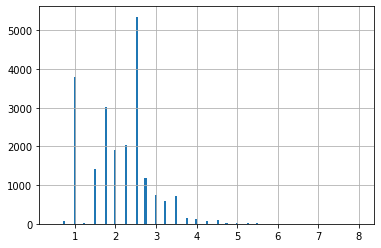

In [47]:
df_clean.bathrooms.hist(bins='auto')

In [48]:
df_clean.bathrooms.value_counts()

2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [49]:
df_clean.bathrooms.value_counts(normalize=True)

2.50    0.249883
1.00    0.177141
1.75    0.140956
2.25    0.094827
2.00    0.089317
1.50    0.066720
2.75    0.055187
3.00    0.034877
3.50    0.034037
3.25    0.027360
3.75    0.007237
4.00    0.006256
4.50    0.004622
4.25    0.003688
0.75    0.003268
4.75    0.001074
5.00    0.000980
5.25    0.000607
5.50    0.000467
1.25    0.000420
6.00    0.000280
5.75    0.000187
0.50    0.000140
8.00    0.000093
6.25    0.000093
6.75    0.000093
6.50    0.000093
7.50    0.000047
7.75    0.000047
Name: bathrooms, dtype: float64

In [50]:
df_clean[['bathrooms', 'price']].corr()

,bathrooms,price
bathrooms,1.000000,0.525223
price,0.525223,1.000000


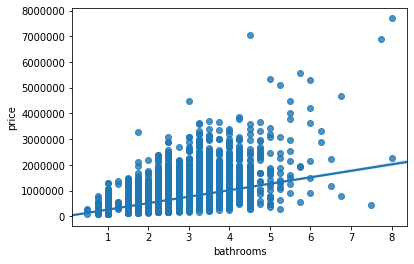

In [51]:
sns.regplot(df_clean.bathrooms, df_clean.price)

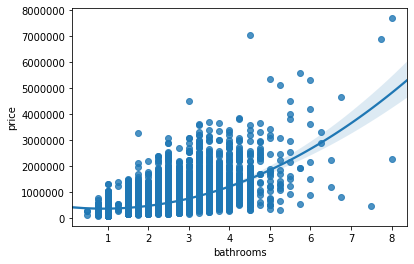

In [52]:
sns.regplot(df_clean.bathrooms, df_clean.price, order=2)

bathrooms has a decent correlation with price.  people want sufficient bathrooms, and with the greatest percentage being in the interval 2 <= bathroom  < 3, that must be the most popular number of bathrooms for this set of properties.  It should be considered for an interaction with bedrooms and potentially a polynomial feature as shown in the above visualization.

### sqft_living

In [53]:
df_clean.sqft_living.describe()

count    21418.000000
mean      2083.144131
std        918.844667
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

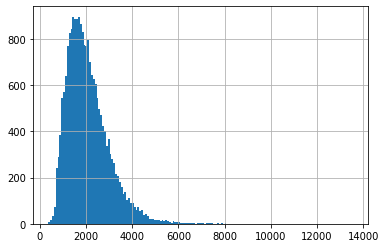

In [54]:
df_clean.sqft_living.hist(bins='auto')

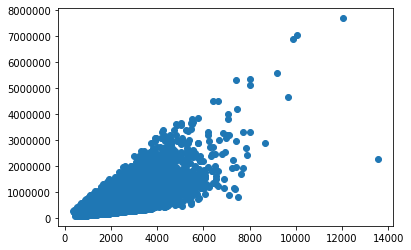

In [55]:
plt.scatter(df_clean.sqft_living, df_clean.price)

In [56]:
df_clean[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.701321
price,0.701321,1.000000


sqft_living is highly correlated with price.  The outlier value with the highest sqft_living value, but an out of line sale price should be considered for dropping.

### sqft_lot

In [57]:
df_clean.sqft_lot.describe()

count    2.141800e+04
mean     1.512891e+04
std      4.153264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.614500e+03
75%      1.069350e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

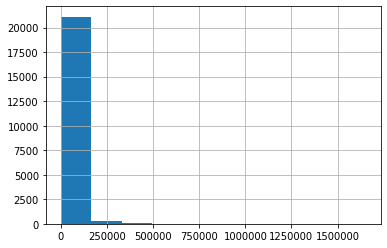

In [58]:
df_clean.sqft_lot.hist()

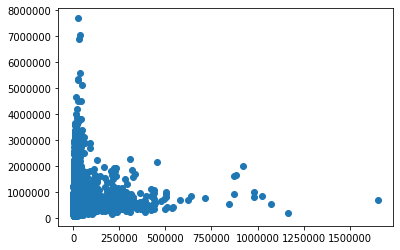

In [59]:
plt.scatter(df_clean.sqft_lot, df_clean.price)

In [60]:
df_clean[['sqft_lot', 'price']].corr()

,sqft_lot,price
sqft_lot,1.000000,0.088786
price,0.088786,1.000000


sqft_lot is not correlated with price, but maybe has an interaction.  All the highest priced properties
have small lots, while the lowest priced properties have the largest lots, but most of the properties have a lower price and lower lot size.

### floors

In [61]:
df_clean.floors.describe()

count    21418.000000
mean         1.495985
std          0.540085
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [62]:
df_clean.floors.value_counts()

1.0    10551
2.0     8202
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

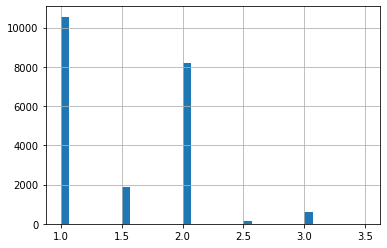

In [63]:
df_clean.floors.hist(bins='auto')

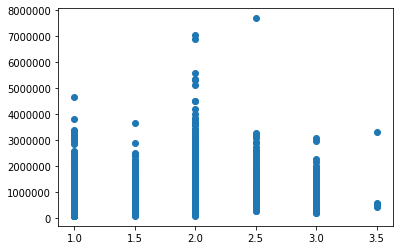

In [64]:
plt.scatter(df_clean.floors, df_clean.price)

In [65]:
df_clean[['floors', 'price']].corr()

,floors,price
floors,1.000000,0.255023
price,0.255023,1.000000


floors has low correlation with price, has potential as an interacting feature. Also, the house
being a 'split level' may offer additional information as an interacting feature, as well as marking a house with 3+ floors as 'something else'

### waterfront

In [66]:
df_clean.waterfront.value_counts()

0.0    21272
1.0      146
Name: waterfront, dtype: int64

In [67]:
df_clean.waterfront.value_counts(normalize=True)

0.0    0.993183
1.0    0.006817
Name: waterfront, dtype: float64

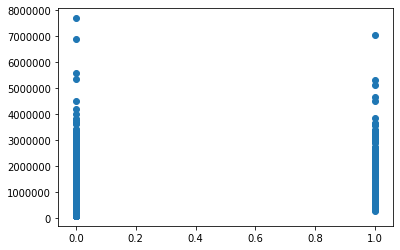

In [68]:
plt.scatter(df_clean.waterfront, df_clean.price)

In [69]:
df_clean[['waterfront', 'price']].corr()

,waterfront,price
waterfront,1.000000,0.264916
price,0.264916,1.000000


waterfront has a low correlation with price.

### view

In [70]:
df_clean.view.value_counts()

0.0    19314
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [71]:
df_clean.view.value_counts(normalize=True)

0.0    0.901765
2.0    0.044635
3.0    0.023578
1.0    0.015361
4.0    0.014661
Name: view, dtype: float64

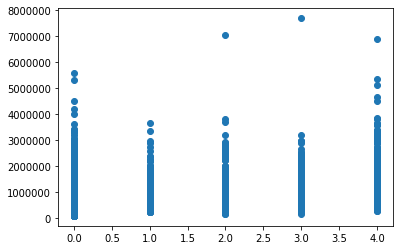

In [72]:
plt.scatter(df_clean.view, df_clean.price)

In [73]:
df_clean[['view', 'price']].corr()

,view,price
view,1.000000,0.392788
price,0.392788,1.000000


view has low correlation with price.

### condition

In [74]:
df_clean.condition.value_counts()

3    13899
4     5643
5     1686
2      162
1       28
Name: condition, dtype: int64

In [75]:
df_clean.condition.value_counts(normalize=True)

3    0.648940
4    0.263470
5    0.078719
2    0.007564
1    0.001307
Name: condition, dtype: float64

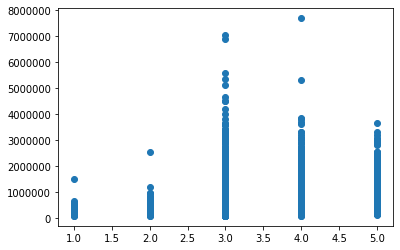

In [76]:
plt.scatter(df_clean.condition, df_clean.price)

In [77]:
df_clean[['condition', 'price']].corr()

,condition,price
condition,1.000000,0.034176
price,0.034176,1.000000


condition has no correlation with price

### grade

In [78]:
df_clean.grade.value_counts()

7     8888
8     6040
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [79]:
df_clean.grade.value_counts(normalize=True)

7     0.414978
8     0.282006
9     0.121673
6     0.093146
10    0.052759
11    0.018489
5     0.010925
12    0.004109
4     0.001261
13    0.000607
3     0.000047
Name: grade, dtype: float64

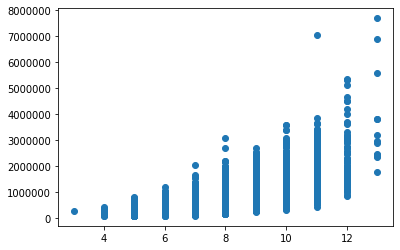

In [80]:
plt.scatter(df_clean.grade, df_clean.price)

In [81]:
df_clean[['grade', 'price']].corr()

,grade,price
grade,1.000000,0.666864
price,0.666864,1.000000


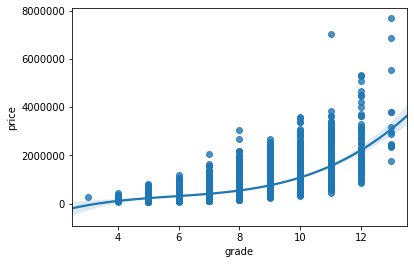

In [82]:
sns.regplot(df_clean.grade, df_clean.price, order=3)

grade is highly correlated with price and visually looks like a candidate for a polynomial.

### sqft_above

In [83]:
df_clean.sqft_above.describe()

count    21418.000000
mean      1791.181530
std        828.708467
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2220.000000
max       9410.000000
Name: sqft_above, dtype: float64

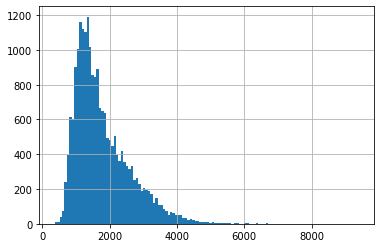

In [84]:
df_clean.sqft_above.hist(bins='auto')

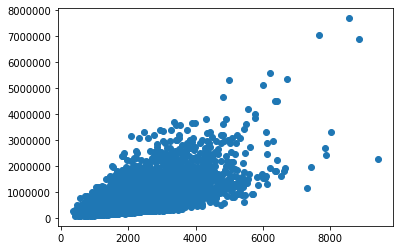

In [85]:
plt.scatter(df_clean.sqft_above, df_clean.price)

In [86]:
df_clean[['sqft_above', 'price']].corr()

,sqft_above,price
sqft_above,1.000000,0.604477
price,0.604477,1.000000


Has a high correlation with price

### sqft_basement

In [87]:
df_clean.sqft_basement.describe()

count    21418.000000
mean       285.936642
std        440.024581
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

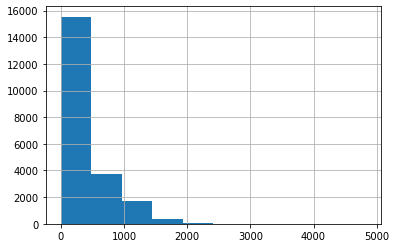

In [88]:
df_clean.sqft_basement.hist()

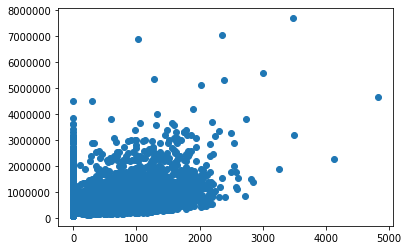

In [89]:
plt.scatter(df_clean.sqft_basement, df_clean.price)

In [90]:
df_clean[['sqft_basement', 'price']].corr()

,sqft_basement,price
sqft_basement,1.000000,0.321247
price,0.321247,1.000000


most properties do not have a basement, but for those that do, there is a low correlation with price.

### yr_built

In [91]:
df_clean.yr_built.describe()

count    21418.000000
mean      1971.092959
std         29.387559
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

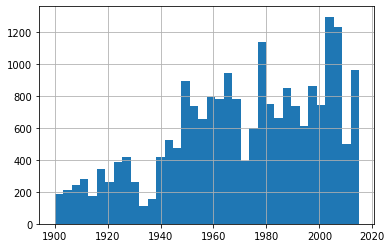

In [92]:
df_clean.yr_built.hist(bins='auto')

In [93]:
df_clean[['yr_built', 'price']].corr()

,yr_built,price
yr_built,1.000000,0.051049
price,0.051049,1.000000


as would be expected, yr_built has no numerical correlation with price, it has 
potential as categorical data

### yr_renovated

In [94]:
df_clean.yr_renovated.describe()

count    21418.000000
mean        68.963162
std        364.568710
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

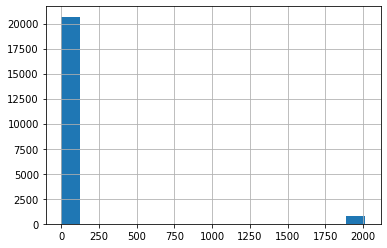

In [95]:
df_clean.yr_renovated.hist(bins='auto')

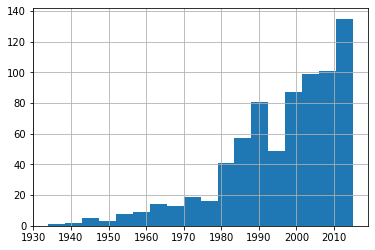

In [96]:
df_clean[df_clean.yr_renovated != 0].yr_renovated.hist(bins='auto')

most houses have not had a renovation, but of those that have, it's been a recent one.  Potentially 
a binary feature for renovation, and a new year feature having the most recent value of yr_built and yr_renovated.  The binary feature may be an interacting term as well.

### zipcode

In [97]:
df_clean.zipcode.describe()

count    21418.000000
mean     98077.872537
std         53.479614
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64

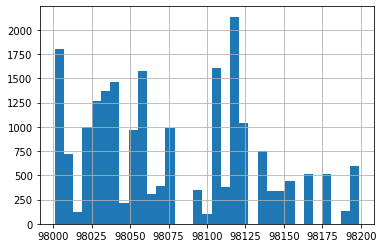

In [98]:
df_clean.zipcode.hist(bins='auto')

In [99]:
df_clean[['zipcode', 'price']].corr()

,zipcode,price
zipcode,1.000000,-0.051168
price,-0.051168,1.000000


Zipcode should be considered a category. Other data can be able to be learned about each category that may be usefull. ie. mean price, num sales, highest price, lowest price.

In [100]:
zip_data_list = []
for zipcode in df_clean.zipcode.unique():
    zip_data = {'zipcode': zipcode,
               'mean_price': round(df_clean[df_clean.zipcode == zipcode].price.mean(), 2),
               'num_sales': len(df_clean[df_clean.zipcode == zipcode]),
               'highest_price': round(df_clean[df_clean.zipcode == zipcode].price.max(), 2),
               'lowest_price': round(df_clean[df_clean.zipcode == zipcode].price.min(), 2)}
    zip_data_list.append(zip_data)

In [101]:
zip_data_df = pd.DataFrame(zip_data_list, columns=zip_data_list[0].keys())

In [102]:
zip_data_df

,zipcode,mean_price,num_sales,highest_price,lowest_price
0,98178,312850.94,258,1700000.0,100000.0
1,98125,472218.57,402,2050000.0,175000.0
2,98028,462426.77,282,1600000.0,160000.0
3,98136,551768.52,263,2230000.0,200000.0
4,98074,689562.75,435,3080000.0,280000.0
...,...,...,...,...,...
65,98072,570698.79,272,1570000.0,200000.0
66,98188,290034.48,135,707000.0,110000.0
67,98014,455715.63,123,1680000.0,80000.0
68,98055,307650.94,260,631000.0,100000.0


In [103]:
for col in zip_data_df.columns[1:]:
    print(col)
    display(zip_data_df.nlargest(5, col))

mean_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
69,98039,2187551.02,49,6890000.0,787500.0
39,98004,1355971.76,315,7060000.0,425000.0
18,98040,1194873.64,282,5300000.0,500000.0
22,98112,1096933.93,268,3400000.0,169317.0
49,98102,899607.67,104,7700000.0,330000.0


num_sales


,zipcode,mean_price,num_sales,highest_price,lowest_price
15,98103,584998.94,599,1700000.0,238000.0
9,98038,367554.41,586,1350000.0,110000.0
11,98115,621708.31,576,2300000.0,200000.0
23,98052,646339.66,571,2200000.0,270000.0
25,98117,578576.00,548,1370000.0,125000.0


highest_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
49,98102,899607.67,104,7700000.0,330000.0
39,98004,1355971.76,315,7060000.0,425000.0
69,98039,2187551.02,49,6890000.0,787500.0
18,98040,1194873.64,282,5300000.0,500000.0
59,98033,804063.88,431,5110000.0,130000.0


lowest_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
69,98039,2187551.02,49,6890000.0,787500.0
18,98040,1194873.64,282,5300000.0,500000.0
39,98004,1355971.76,315,7060000.0,425000.0
42,98075,791602.68,358,3200000.0,406430.0
40,98005,810289.70,168,1960000.0,400000.0


In [104]:
for col in zip_data_df.columns[1:]:
    print(col)
    display(zip_data_df.nsmallest(5, col))

mean_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
16,98002,234606.72,197,389000.0,95000.0
52,98168,242447.75,264,600000.0,78000.0
47,98032,253317.32,123,545000.0,85000.0
27,98001,282268.85,358,850000.0,100000.0
32,98148,288112.32,56,600600.0,122000.0


num_sales


,zipcode,mean_price,num_sales,highest_price,lowest_price
69,98039,2187551.02,49,6890000.0,787500.0
32,98148,288112.32,56,600600.0,122000.0
61,98024,590059.11,79,1860000.0,200000.0
44,98010,420470.70,99,935000.0,135000.0
49,98102,899607.67,104,7700000.0,330000.0


highest_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
16,98002,234606.72,197,389000.0,95000.0
47,98032,253317.32,123,545000.0,85000.0
20,98030,297939.22,253,565000.0,139000.0
52,98168,242447.75,264,600000.0,78000.0
32,98148,288112.32,56,600600.0,122000.0


lowest_price


,zipcode,mean_price,num_sales,highest_price,lowest_price
52,98168,242447.75,264,600000.0,78000.0
67,98014,455715.63,123,1680000.0,80000.0
47,98032,253317.32,123,545000.0,85000.0
30,98023,288448.60,492,1280000.0,89000.0
8,98146,363846.35,281,1410000.0,89950.0


#### heatmaps

In [105]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [106]:
Lon = np.linspace(df_clean.long.min(), df_clean.long.max(), 100) 
Lat = np.linspace(df_clean.lat.min(), df_clean.lat.max(), 100) 

lat_increment = abs(Lat[1] - Lat[0])
long_increment = abs(Lon[1] - Lon[0])

**A heatmap of property sale activity**

In [107]:
house_counts = np.zeros((100,100)) 

for house in range(len(df_clean)):
    i0 = int(abs(df_clean['lat'].values[house] - df_clean['lat'].min()) // lat_increment)
    i1 = int(abs(df_clean['long'].values[house] - df_clean['long'].min()) // long_increment)
    house_counts[i0, i1] += 1
    
longitude_values = [Lon,]*100 
latitude_values = np.repeat(Lat,100) 

house_counts.resize((10000,)) 

heatmap_data = {'Counts': house_counts, 
                'latitude': latitude_values, 
                'longitude' : np.concatenate(longitude_values)} 

In [108]:
df_map = pd.DataFrame(data=heatmap_data) 

In [109]:
with open('cleaned_washington_geodata.json') as f:
    geometry = json.load(f)
zipcodes_layer = gmaps.geojson_layer(geometry, fill_opacity=0)

In [110]:
locations = df_map[['latitude', 'longitude']] 
weights = df_map['Counts'] 
fig = gmaps.figure(center=(47.6092,-122.3363), zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights) 
fig.add_layer(heatmap_layer)
fig.add_layer(zipcodes_layer)
fig 


Figure(layout=FigureLayout(height='420px'))

The above heat map must be rerun to be viewed.  Below is a screen grab of the map.

![Screen Grab of the above heat map](images/heat_map_zip_codes_only.png)

There is a lot of price and activity variety relating to zipcodes; they should definately be a categorical feature.

The sales volume and the gross sales are all in the western portion of the county centered around the major cities of Seattle, Redmond, Bellevue and Kirkland.

Because zipcode do not have a uniform size, the sales volume directly isn't very informative, although it does have some correlation to the total value of sales in a zip code.



### lat long

In [111]:
df_clean.lat.describe()

count    21418.000000
mean        47.560202
std          0.138584
min         47.155900
25%         47.471225
50%         47.572100
75%         47.678075
max         47.777600
Name: lat, dtype: float64

In [112]:
df_clean.long.describe()

count    21418.000000
mean      -122.213780
std          0.140794
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

Proximity to one of a major cities maybe a significant feature relating to lat/long, that can add to the zipcode location data.

Using lat/long as a binned categorical feature may also help narrow down the location based component of price.

### sqft_living15

In [113]:
df_clean.sqft_living15.describe()

count    21418.000000
mean      1988.422682
std        685.553337
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64

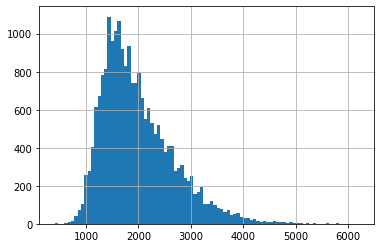

In [114]:
df_clean.sqft_living15.hist(bins='auto')

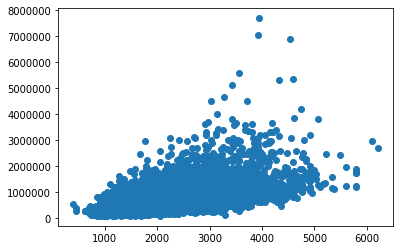

In [115]:
plt.scatter(df_clean.sqft_living15, df_clean.price)

In [116]:
df_clean[['sqft_living15', 'price']].corr()

,sqft_living15,price
sqft_living15,1.000000,0.583816
price,0.583816,1.000000


sqft_living15 has a good correlation with price, but not as good as sqft_living.  They are a candidate for an interacting feature.

### sqft_lot15

In [117]:
df_clean.sqft_lot15.describe()

count     21418.000000
mean      12776.394248
std       27346.807953
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10086.750000
max      871200.000000
Name: sqft_lot15, dtype: float64

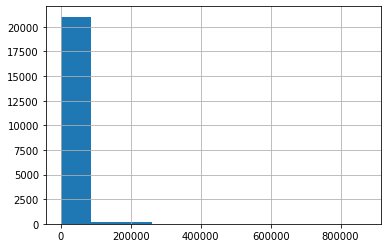

In [118]:
df_clean.sqft_lot15.hist()

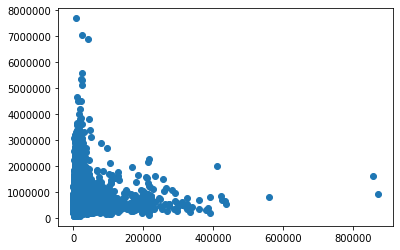

In [119]:
plt.scatter(df_clean.sqft_lot15, df_clean.price)

In [120]:
df_clean[['sqft_lot15', 'price']].corr()

,sqft_lot15,price
sqft_lot15,1.000000,0.082043
price,0.082043,1.000000


Has no correlation with price.  If a way is found to include it in the model, the extreme outliers should probably be removed.

### Features with the highest correlation with price.

The numerical features with a high correlation are: 
* sqft_living
* grade
* sqft_above.

Location also, looks to be important, but that would be depenend on a categorical feature like zipcode.

Features with a moderate correlation with price are: 
* bedrooms
* bathrooms
* view

Features with some correlation with price are:
* floors

## Check for multicollinearity among the features 

In [121]:
df_clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_month'],
      dtype='object')

In [122]:
cols_to_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

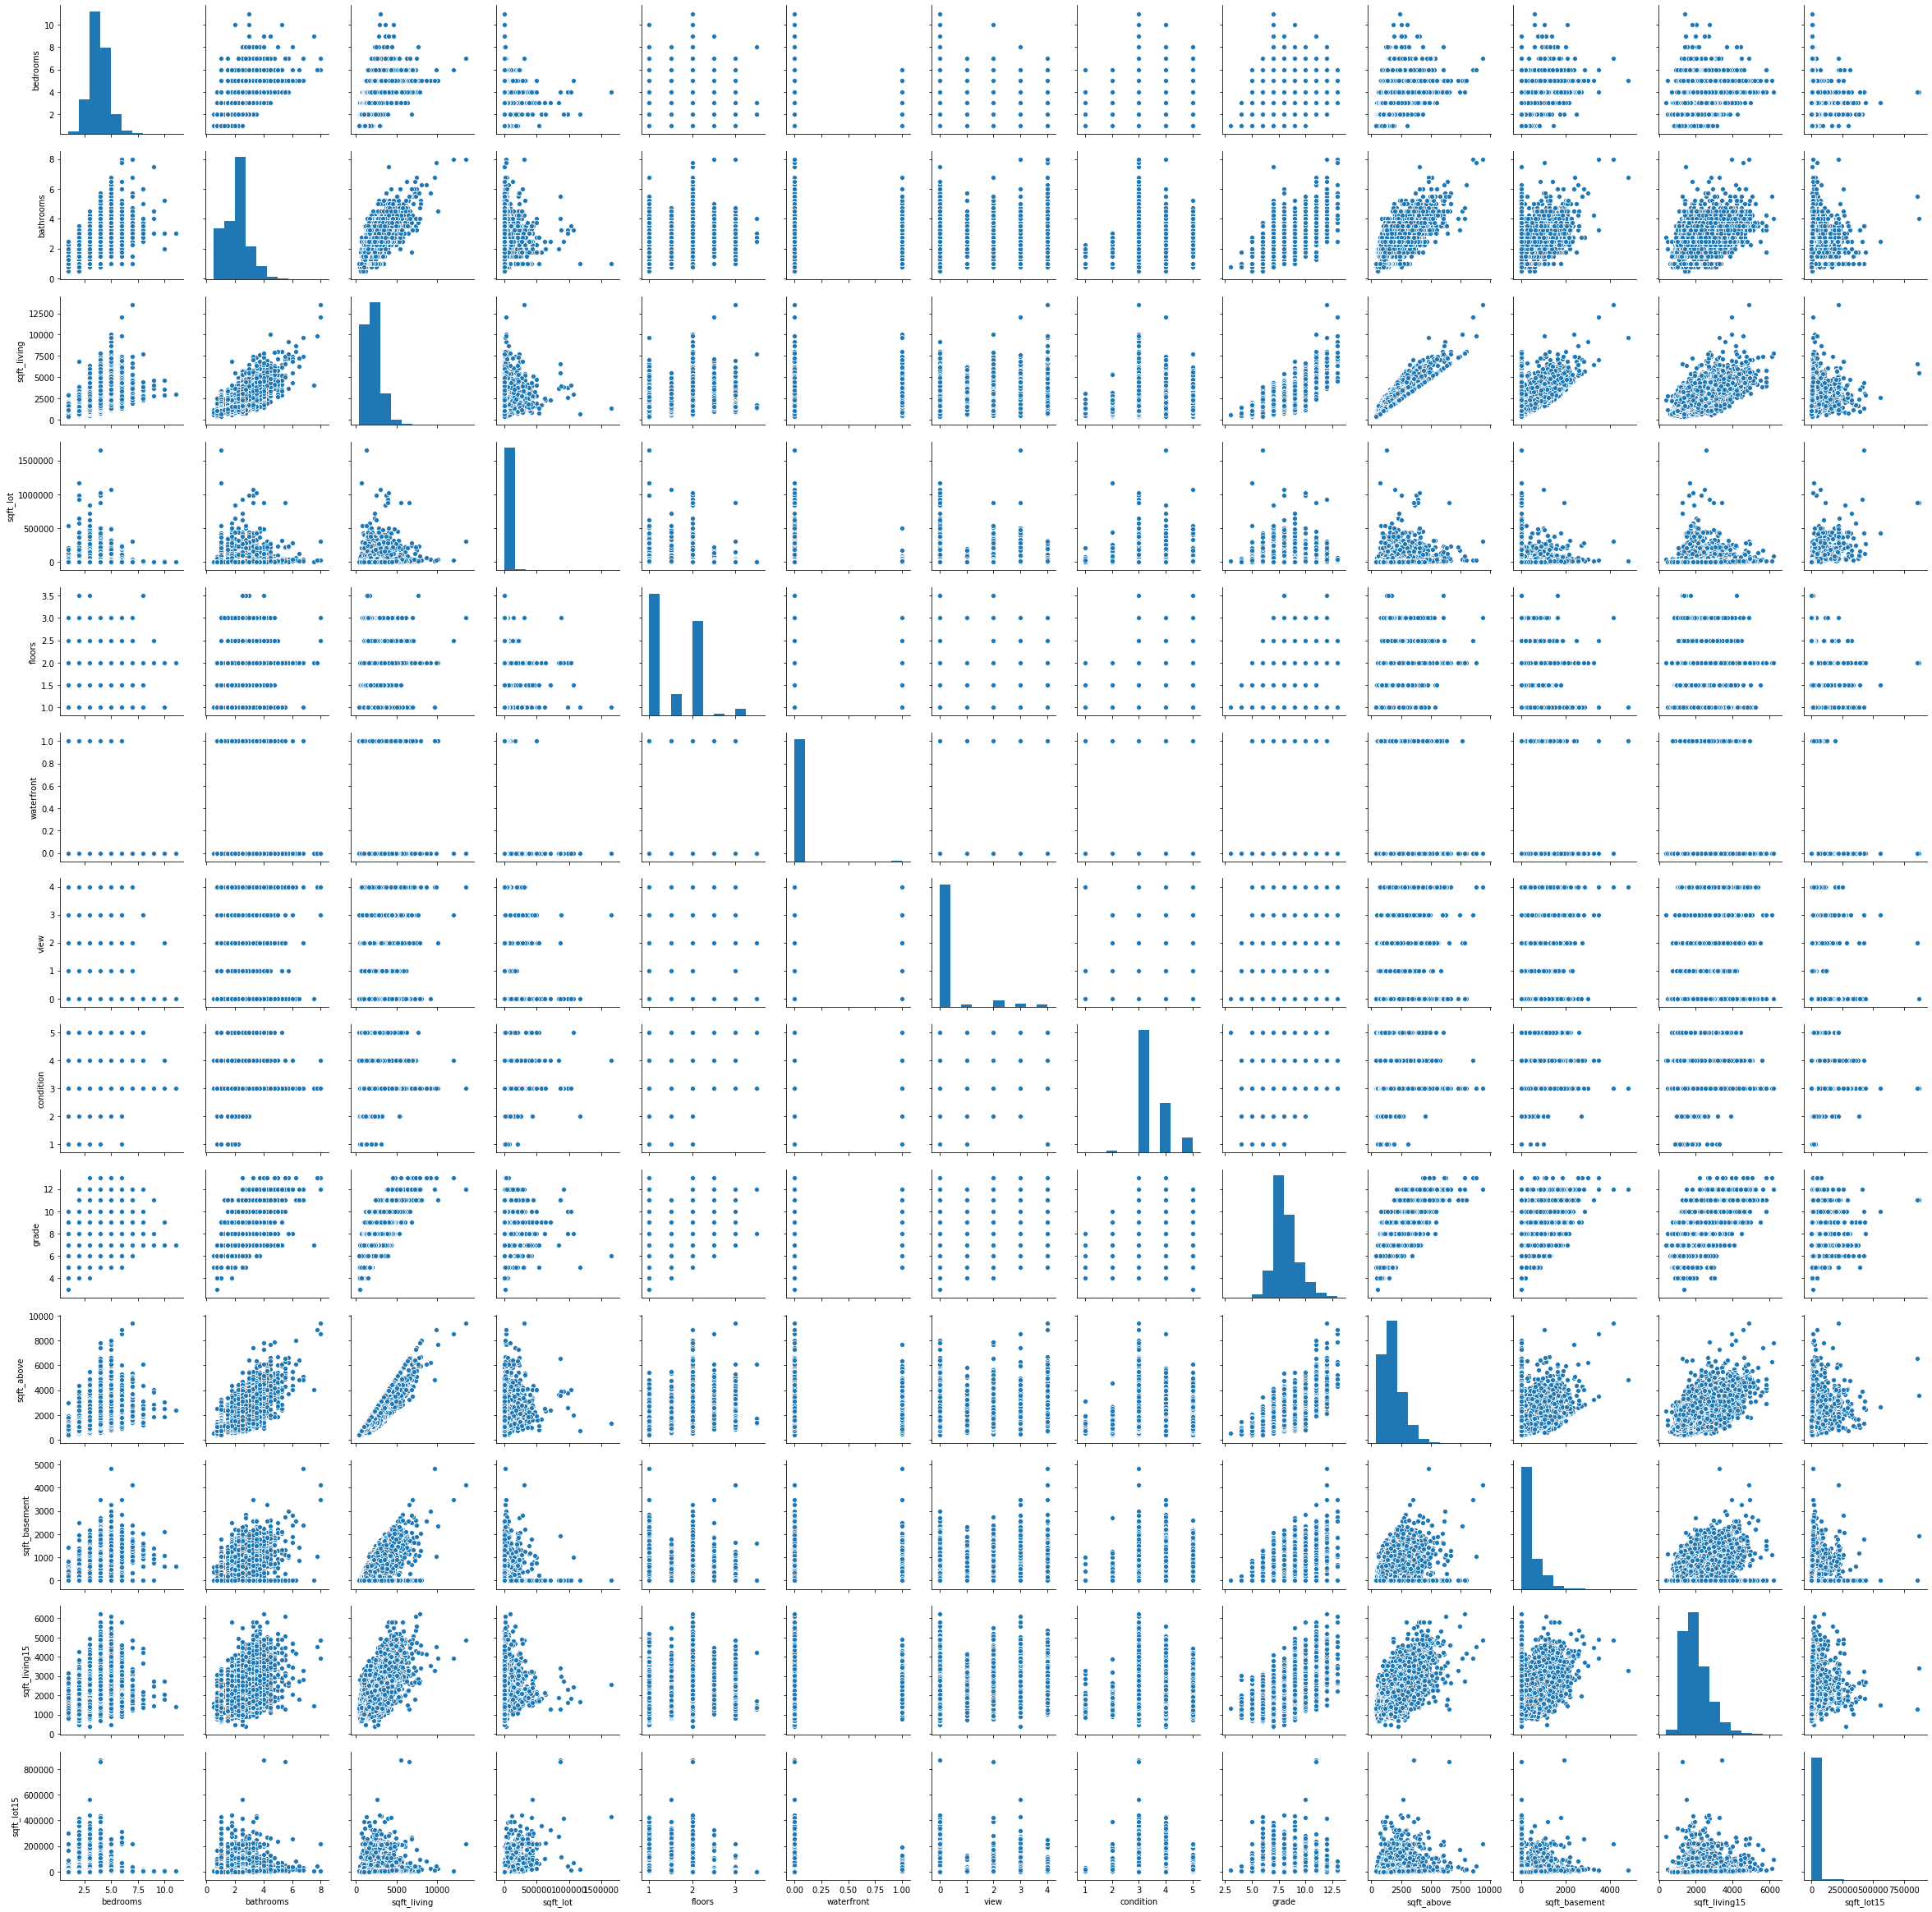

In [123]:
sns.pairplot(df_clean[cols_to_check])

In [124]:
df_clean[['sqft_living', 'sqft_above']].corr()

,sqft_living,sqft_above
sqft_living,1.000000,0.876536
sqft_above,0.876536,1.000000


In [125]:
df_clean[['sqft_living', 'sqft_living15']].corr()

,sqft_living,sqft_living15
sqft_living,1.000000,0.756189
sqft_living15,0.756189,1.000000


In [126]:
def correlation_triangle(d):

    # Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

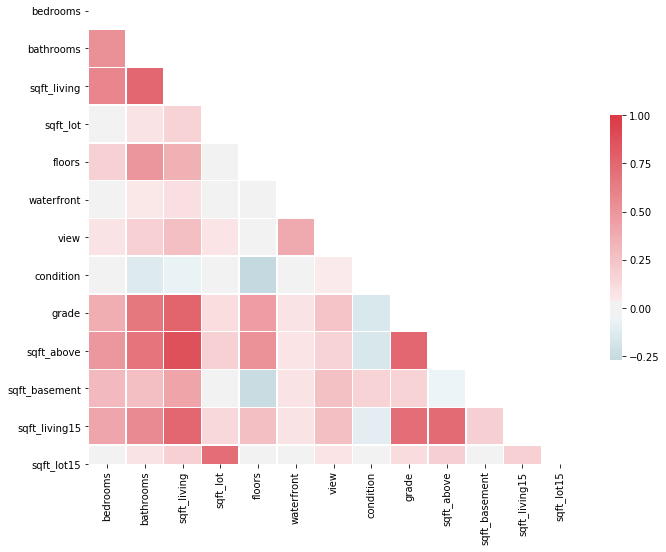

In [127]:
correlation_triangle(df_clean[cols_to_check])

In [128]:
df_clean[['bathrooms', 'bedrooms', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above']].corr()

,bathrooms,bedrooms,grade,sqft_living,sqft_living15,sqft_above
bathrooms,1.000000,0.529041,0.665681,0.755622,0.569482,0.686462
bedrooms,0.529041,1.000000,0.367738,0.594217,0.406245,0.493550
grade,0.665681,0.367738,1.000000,0.762474,0.713179,0.756217
sqft_living,0.755622,0.594217,0.762474,1.000000,0.756189,0.876536
sqft_living15,0.569482,0.406245,0.713179,0.756189,1.000000,0.731891
sqft_above,0.686462,0.493550,0.756217,0.876536,0.731891,1.000000


### Summary

Looking at the Pairplot, correlation triangle and correlation matrix, it is obvious that there is a lot of multicollinearity in the data.

I'll put the initial cut off for multicolinearity at 0.8, which will only exclude sqft_above.

If I lower it to 0.75, sqft_living15, grade, and bathrooms would also be excluded.

As the modeling process proceeds, the cut off may need to be revised, and a transformation may be needed to not lose too much data.

## Exploritory Visualizations

### Bedroom/Bathroom combos

How do bedrooms and bathrooms relate to each other?

In [129]:
df_clean['bedbath'] = tuple(zip(df_clean.bedrooms, df_clean.bathrooms))

In [130]:
df_clean.bedbath.value_counts()[:10]

(4, 2.5)     2492
(3, 2.5)     2347
(3, 1.75)    1853
(3, 1.0)     1750
(2, 1.0)     1540
(3, 2.25)    1072
(3, 2.0)     1040
(3, 1.5)      818
(4, 1.75)     713
(4, 2.25)     707
Name: bedbath, dtype: int64

We see that houses with 4 or 3 bedrooms and 2.5 bathrooms are the cost common house type.

In [131]:
df_clean['bedbath_ratio'] = df_clean.bathrooms / df_clean.bedrooms

In [132]:
df_clean['bedbath_ratio'].describe()

count    21418.000000
mean         0.641561
std          0.211227
min          0.142857
25%          0.500000
50%          0.625000
75%          0.750000
max          2.500000
Name: bedbath_ratio, dtype: float64

In [133]:
df_bb = df_clean[df_clean.price > 0]

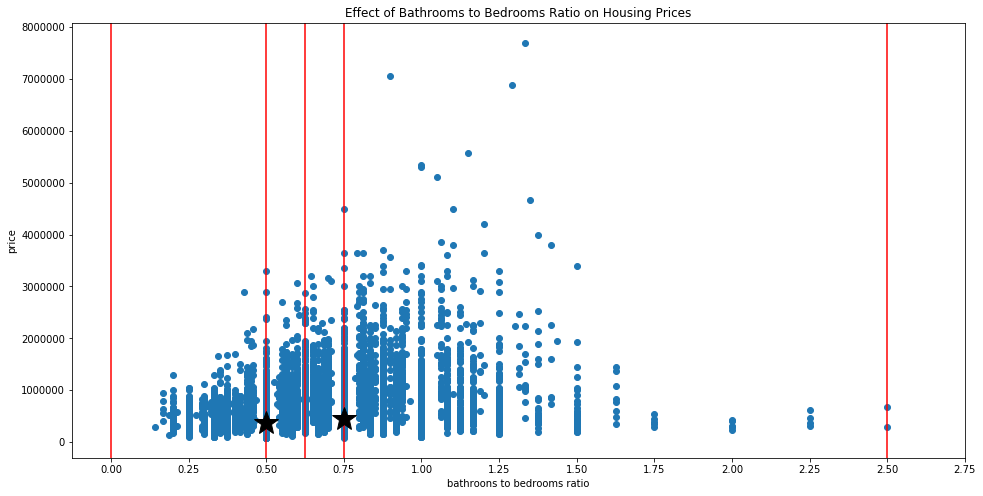

In [134]:
plt.figure(figsize=(16,8))
plt.scatter(df_bb['bedbath_ratio'], df_bb.price)

# quantiles for the bedroom/bathroom ratio taking from the output of the above
#  describe function
quantiles = [0.0, 0.5, 0.625, 0.75, 2.5]

# put vertical red lines on the visualization indicating the quantiles
for quantile in quantiles:
    plt.axvline(quantile, color='r')

# plot the median house price at 0.5 and 0.75
price_at_05 = df_bb[df_bb.bedbath_ratio == 0.5]['price'].median()
plt.plot(0.5, price_at_05, "*", color='black', markersize=25)

price_at_75 = df_bb[df_bb.bedbath_ratio == 0.75]['price'].median()
plt.plot(0.75, price_at_75, "*", color='black', markersize=25)

plt.xlabel('bathroons to bedrooms ratio')
plt.ylabel('price')
ticks = np.array(range(0,300,25))/100
plt.xticks(ticks)
plt.title('Effect of Bathrooms to Bedrooms Ratio on Housing Prices')
plt.show()

The above visualization shows how the price of house increases up to around a 1:1 ratio and then starts to decrease.  When the bathroom to bedroom ratio is over one the houses must be seen a "bathroom heavy" or in rare cases are mansions that have sale prices over \\$4million.  50\% of the houses in the dataset are between 0.5 and 0.75.  Example rooms in these houses are 2 bedrooms with 1 bathroom at 0.5, and 3 bedrooms with 2.25 bathrooms at 0.75.

Houses with bed to bath ratios between 0.5 and 0.75 can be seen as the most common, and therefore the most desirable.  We would want to recommend expecting to pay between \\$370K and \\$450K for a house in this category, where those prices are the mean at 0.5 and 0.75 respectively.

### Gross Sales / Zip code

How do housing sales relate to zip code?

**A heatmap of total sales per sector**

In [135]:
house_price_sums = np.zeros((100,100)) 

for house in range(len(df_clean)):
    i0 = int(abs(df_clean['lat'].values[house] - df_clean['lat'].min()) // lat_increment)
    i1 = int(abs(df_clean['long'].values[house] - df_clean['long'].min()) // long_increment)
    house_price_sums[i0, i1] += df_clean['price'].values[house]

In [136]:
house_price_sums.resize((10000,)) 

In [137]:
prices_heatmap_data = {'Counts': house_price_sums, 
                'latitude': latitude_values, 
                'longitude' : np.concatenate(longitude_values)} 
df_prices_map = pd.DataFrame(data=prices_heatmap_data) 

In [138]:
with open('cleaned_washington_geodata.json') as f:
    geometry = json.load(f)
zipcodes_layer = gmaps.geojson_layer(geometry, fill_opacity=0)

In [139]:
with open('us-county-boundaries.geojson') as f:
    geometry = json.load(f)
county_layer = gmaps.geojson_layer(geometry, fill_opacity=0.1)

In [140]:
locations = df_prices_map[['latitude', 'longitude']] 
weights = df_prices_map['Counts'] 
fig = gmaps.figure(center=(47.6092,-122.3363), zoom_level=10)

# zipcode markers for top 3 most active markets
zip_98103 = gmaps.Marker((47.671, -122.342), info_box_content='98103 Seattle')
zip_98038 = gmaps.Marker((47.382, -122.036), info_box_content='98038 Maple Valley')
zip_98115 = gmaps.Marker((47.684, -122.301), info_box_content='98115 Seattle')
zip_markers = gmaps.drawing_layer(features=[zip_98103, zip_98038, zip_98115], show_controls=False)

fig.add_layer(zip_markers)
fig.add_layer(zipcodes_layer)
fig.add_layer(county_layer)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights)) 
fig 

Figure(layout=FigureLayout(height='420px'))

The interactive gmaps must be rerun to be seen.  A screen grab is shown below.

![screen grab of the above interactive heat map](images/heat_map_zip_codes_3_cities.png)

The above heatmap shows the total value of the gross sales of houses throughout King County.  The zipcode boundaries are shown in black and the top three most active zipcodes are indicated by the red markers.  A majority of the housing value is concentrated close to Seattle with other hot spots around the major cities in the county.  Zipcode 98038, around Maple Valley is the 2nd most active location but has a relatively low mean sale price compared to the two zipcodes closer to Seattle.  In Maple Valley you could expect to get a house for around \\$400K vs needing to pay around \\$600K closer to Seattle.  The money vs. commute time trade off would be a good thing to present on our website, both to home buyers and corporate clients.

### Square Feet Above the Basement

What sizes of houses are offered in different zip codes and how does that relate to their prices?

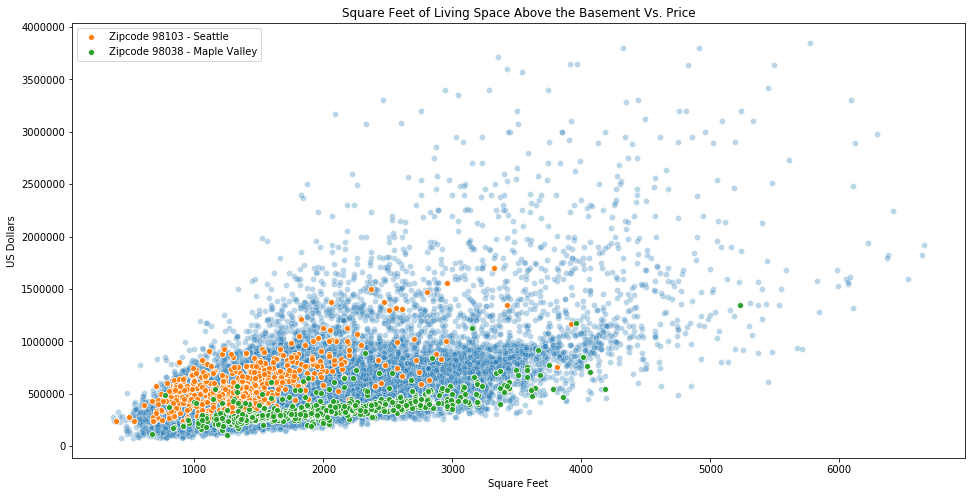

In [141]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='sqft_above', y='price', alpha=0.3,
                data=df_clean[(df_clean.price < 4000000) & (df_clean.sqft_above < 7000)])

sns.scatterplot(x='sqft_above', y='price', label='Zipcode 98103 - Seattle',
                data=df_clean[(df_clean.price < 4000000) & (df_clean.sqft_above < 7000) & (df_clean.zipcode == 98103)])

sns.scatterplot(x='sqft_above', y='price', label='Zipcode 98038 - Maple Valley',
                data=df_clean[(df_clean.price < 4000000) & (df_clean.sqft_above < 7000) & (df_clean.zipcode == 98038)])


plt.title('Square Feet of Living Space Above the Basement Vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('US Dollars')
plt.legend()
plt.show()

The above visualization shows the positive correlation between the amount of square feet of living space above the basement in a house and that house's selling price.

The two most active zipcodes in King County, 98103, part of Seattle, and 98038, Maple Valley, are indicated in Orange and Green respectively. The overall correlation between the two variables is maintained in each zipcode, but there are several distinctions between the zipcodes that can be seen in the visualization.  First is that most of the houses near Seattle are more expensive than the ones in Maple Valley, second is that there is a wider variety of house sizes available in Maple Valley, and third is that there is a wider range of prices per square foot in Seattle than in Maple Valley.